In [1]:
import polars as pl
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # MUST BE BEFORE torch import

import torch

path = "/home/astrodados4/downloads/hypercube/datacube_HYDRA-0011.parquet"

In [2]:
df = pl.read_parquet(path)

In [3]:
list(df.columns)

['id',
 'random_idx',
 'ra',
 'dec',
 'field',
 'a_pixel_det',
 'a_restricted_pixel_r',
 'b_pixel_det',
 'b_restricted_pixel_r',
 'class_star_det',
 'class_star_g',
 'class_star_i',
 'class_star_j0378',
 'class_star_j0395',
 'class_star_j0410',
 'class_star_j0430',
 'class_star_j0515',
 'class_star_j0660',
 'class_star_j0861',
 'class_star_r',
 'class_star_u',
 'class_star_z',
 'ellipticity_det',
 'elongation_det',
 'err_a_pixel_det',
 'err_b_pixel_det',
 'err_mag_aper_3_g',
 'err_mag_aper_3_i',
 'err_mag_aper_3_j0378',
 'err_mag_aper_3_j0395',
 'err_mag_aper_3_j0410',
 'err_mag_aper_3_j0430',
 'err_mag_aper_3_j0515',
 'err_mag_aper_3_j0660',
 'err_mag_aper_3_j0861',
 'err_mag_aper_3_r',
 'err_mag_aper_3_u',
 'err_mag_aper_3_z',
 'err_mag_aper_6_g',
 'err_mag_aper_6_i',
 'err_mag_aper_6_j0378',
 'err_mag_aper_6_j0395',
 'err_mag_aper_6_j0410',
 'err_mag_aper_6_j0430',
 'err_mag_aper_6_j0515',
 'err_mag_aper_6_j0660',
 'err_mag_aper_6_j0861',
 'err_mag_aper_6_r',
 'err_mag_aper_6_u',
 '

In [4]:
df = df.filter(pl.col("splus_cut_F378").is_not_null())

In [5]:
bands = [
    'F378', 'F395', 'F410', 'F430', 'F515', 'F660', 'F861',
    'U', 'G', 'R', 'I', 'Z'
]

In [6]:
df

id,random_idx,ra,dec,field,a_pixel_det,a_restricted_pixel_r,b_pixel_det,b_restricted_pixel_r,class_star_det,class_star_g,class_star_i,class_star_j0378,class_star_j0395,class_star_j0410,class_star_j0430,class_star_j0515,class_star_j0660,class_star_j0861,class_star_r,class_star_u,class_star_z,ellipticity_det,elongation_det,err_a_pixel_det,err_b_pixel_det,err_mag_aper_3_g,err_mag_aper_3_i,err_mag_aper_3_j0378,err_mag_aper_3_j0395,err_mag_aper_3_j0410,err_mag_aper_3_j0430,err_mag_aper_3_j0515,err_mag_aper_3_j0660,err_mag_aper_3_j0861,err_mag_aper_3_r,err_mag_aper_3_u,…,specz_e_z,specz_f_z,specz_original_f_z,specz_class_spec,specz_subclass,specz_subsubclass,specz_original_class_spec,specz_source,vista_sourceid,vista_ra2000,vista_dec2000,vista_yapermag3,vista_yapermag3err,vista_yapermag4,vista_yapermag4err,vista_yapermag6,vista_yapermag6err,vista_japermag3,vista_japermag3err,vista_japermag4,vista_japermag4err,vista_japermag6,vista_japermag6err,vista_hapermag3,vista_hapermag3err,vista_hapermag4,vista_hapermag4err,vista_hapermag6,vista_hapermag6err,vista_ksapermag3,vista_ksapermag3err,vista_ksapermag4,vista_ksapermag4err,vista_ksapermag6,vista_ksapermag6err,vista_ra,vista_dec
binary,i64,f64,f64,binary,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f64,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"b""i06H001100003""",119809653,149.954748,-24.593265,"b""HYDRA-0011""",1.137278,1.136658,1.000288,0.999773,0.053547,0.347015,0.23164,0.346764,0.346825,0.346686,0.346923,0.346746,0.652347,0.033816,0.038165,0.347263,0.076908,0.120454,1.13695,0.075282,0.065302,13.837123,0.072525,null,null,null,null,null,0.160009,0.163193,0.166264,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"b""i06H00110000M""",20346042,150.194979,-24.592109,"b""HYDRA-0011""",1.334609,1.348997,1.186396,1.185248,0.901893,0.125559,0.507066,0.071045,0.007799,0.004378,0.07621,0.000716,0.617737,0.451103,0.944547,0.016491,0.429608,0.111054,1.124927,0.031828,0.028065,0.035678,0.030784,0.184381,0.18341,0.268294,0.178868,0.084596,0.044908,0.100811,0.02551,0.124493,…,null,null,null,null,null,null,null,null,4.7285e11,150.194979,-24.592091,null,null,null,null,null,null,18.322908,0.07065,18.338017,0.084422,18.245247,0.129696,null,null,null,null,null,null,17.914845,0.199935,17.828348,0.231499,17.658508,0.360197,150.194979,-24.592091
"b""i06H00110000N""",70810543,149.930702,-24.590851,"b""HYDRA-0011""",1.405123,1.401706,1.319195,1.301826,0.978319,0.156008,0.835746,0.354472,0.351432,0.366036,0.505135,0.621374,0.867319,0.730709,0.975974,0.347755,0.962459,0.061154,1.065137,0.019986,0.018315,0.053581,0.027532,null,268.45517,0.459117,0.295921,0.146753,0.03135,0.056142,0.028077,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"b""i06H00110000P""",5889210,150.180793,-24.591861,"b""HYDRA-0011""",1.281376,1.281439,1.172136,1.172207,0.885173,0.43096,0.934606,0.346895,0.34676,0.347312,0.346721,0.378662,0.814215,0.069583,0.828242,0.34663,0.722382,0.085252,1.093197,0.026135,0.024956,0.122682,0.018129,null,null,null,null,1.018859,0.049228,0.03484,0.038987,null,…,null,null,null,null,null,null,null,null,4.7285e11,150.180787,-24.591853,null,null,null,null,null,null,16.3557,0.012368,16.371902,0.014401,16.376556,0.023505,null,null,null,null,null,null,15.538778,0.023208,15.550307,0.028963,15.506456,0.049904,150.180787,-24.591853
"b""i06H00110000Z""",51912355,150.480332,-24.590446,"b""HYDRA-0011""",1.11822,1.119092,0.999068,0.999905,0.732867,0.351525,0.097259,0.346789,0.346198,0.3474,0.347094,0.348206,0.604913,0.064591,0.81763,0.346577,0.058517,0.10655

In [7]:
import math
import polars as pl
import torch

# adapt U/G/R/I/Z if your real columns are lowercase
BANDS = [
    "F378", "F395", "F410", "F430",
    "F515", "F660", "F861",
    "U", "G", "R", "I", "Z",
]


# 🔹 Convert flattened arrays into square images
def _to_image_torch(flat) -> torch.Tensor:
    arr = torch.as_tensor(flat, dtype=torch.float32)

    if arr.ndim == 2:
        return arr

    if arr.ndim == 1:
        n = arr.numel()
        side = int(math.isqrt(n))
        if side * side != n:
            raise ValueError(f"Cannot reshape length {n} into a square image")
        return arr.view(side, side)

    raise ValueError(f"Unexpected ndim={arr.ndim} for image data")


# 🔹 Elliptical footprint from SExtractor parameters
def elliptical_mask(H, W, x0, y0, a, b, theta, device="cpu", expand_factor=4.0):
    """
    Binary mask: 1 inside expanded ellipse, 0 outside.
    """
    yy, xx = torch.meshgrid(
        torch.arange(H, device=device),
        torch.arange(W, device=device),
        indexing="ij"
    )

    yy = yy.float()
    xx = xx.float()

    a_scaled = a * expand_factor
    b_scaled = b * expand_factor

    X = xx - x0
    Y = yy - y0

    ct = torch.cos(theta)
    st = torch.sin(theta)

    Xp =  X * ct + Y * st
    Yp = -X * st + Y * ct

    mask = (Xp / a_scaled) ** 2 + (Yp / b_scaled) ** 2 <= 1.0
    return mask.float()


# 🔹 Detection-aware Sigma:
#     - noise from background
#     - weight by how much object stands above sky in that band
def compute_sigma_detection_aware(x: torch.Tensor,
                                  m_pix: torch.Tensor,
                                  eps: float = 1e-3) -> torch.Tensor:
    """
    x    : (C, H, W) flux
    m_pix: (C, H, W) mask of valid object pixels (0/1)

    For each band c:
      - estimate sky sigma from pixels OUTSIDE mask
      - estimate object median from INSIDE mask
      - compute band SNR = (med_in - med_bg) / sigma_bg
      - weight in [0,1]: w = snr / (snr + 1)
      - Sigma_inside = w * 1 / sigma_bg^2 ; Sigma_outside = 0
    """
    device = x.device
    C, H, W = x.shape
    Sigma = torch.zeros_like(x, device=device)

    for c in range(C):
        mask_in = m_pix[c] > 0.5
        mask_out = ~mask_in

        # background pixels
        bg_vals = x[c][mask_out]
        if bg_vals.numel() < 10:
            # fallback: use all non-NaN pixels as "background"
            bg_vals = x[c][torch.isfinite(x[c])]

        if bg_vals.numel() == 0:
            continue

        med_bg = bg_vals.median()
        mad_bg = (bg_vals - med_bg).abs().median()

        # convert MAD -> "sigma" (optional factor ~1.48 if you want Gaussian eq.)
        sigma_bg = mad_bg + eps

        # object pixels
        obj_vals = x[c][mask_in]
        if obj_vals.numel() == 0:
            continue

        med_in = obj_vals.median()

        # band-level SNR (how much object stands above sky)
        snr_band = (med_in - med_bg) / (sigma_bg + eps)

        # clamp: negative => 0 (object dimmer than sky)
        snr_band = torch.clamp(snr_band, min=0.0)

        # map to [0,1): 0 -> pure sky, ~1 -> strong detection
        weight = snr_band / (snr_band + 1.0 + eps)

        base_invvar = 1.0 / (sigma_bg ** 2 + eps)

        Sigma[c][mask_in] = weight * base_invvar

    return Sigma


# 🔹 Main function
def row_to_tensors_torch(df: pl.DataFrame, idx: int, device: str = "cpu"):
    """
    Returns:
      x      : (C, H, W) flux
      Sigma  : (C, H, W) detection-aware weight map
      m_pix  : (C, H, W) validity mask (0/1), including elliptical footprint
      m_band : (C,) per-band mask (0/1)
    """
    imgs = []
    masks_pix_binary = []

    # build images
    for band in BANDS:
        flat = df[f"splus_cut_{band}"][idx]
        img = _to_image_torch(flat)

        valid = torch.isfinite(img) & (img != 0.0)

        img_clean = img.clone()
        img_clean[~torch.isfinite(img_clean)] = 0.0

        imgs.append(img_clean)
        masks_pix_binary.append(valid.float())

    x = torch.stack(imgs, dim=0).to(device)         # (C, H, W)
    m_pix_basic = torch.stack(masks_pix_binary, dim=0).to(device)

    C, H, W = x.shape

    # Image center as object center (adapt if you have real X/Y columns)
    x0 = torch.tensor(48.0, device=device)
    y0 = torch.tensor(48.0, device=device)

    a  = torch.tensor(float(df["a_pixel_det"][idx]), device=device)
    b  = torch.tensor(float(df["b_pixel_det"][idx]), device=device)
    th = torch.tensor(float(df["theta_det"][idx]), device=device)

    theta = th * math.pi / 180.0

    obj_mask = elliptical_mask(
        H, W,
        x0=x0,
        y0=y0,
        a=a,
        b=b,
        theta=theta,
        device=device,
    )

    obj_mask_full = obj_mask.unsqueeze(0).expand(C, H, W)

    # refined pixel mask: finite pixels inside ellipse
    m_pix = m_pix_basic * obj_mask_full

    # per-band flag
    m_band = (m_pix.sum(dim=(1, 2)) > 0).float()

    # detection-aware Sigma
    Sigma = compute_sigma_detection_aware(x, m_pix)

    return x, Sigma, m_pix, m_band

In [8]:
idx = 10000
x, Sigma, m_pix, m_band = row_to_tensors_torch(df, idx, device="cuda" if torch.cuda.is_available() else "cpu")

print("x:", x.shape)
print("Sigma:", Sigma.shape)
print("m_pix:", m_pix.shape)
print("m_band:", m_band.shape)

x: torch.Size([12, 96, 96])
Sigma: torch.Size([12, 96, 96])
m_pix: torch.Size([12, 96, 96])
m_band: torch.Size([12])


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def debug_plot_sample_torch(x, Sigma, m_pix, m_band, bands=BANDS, band_indices=(0, 1, 2, 3)):
    """
    x, Sigma, m_pix, m_band are torch tensors:
      x: (C, H, W)
      Sigma: (C, H, W)
      m_pix: (C, H, W)
      m_band: (C,)
    """
    # move to CPU & numpy
    x_np = x.detach().cpu().numpy()
    sigma_np = Sigma.detach().cpu().numpy()
    mpix_np = m_pix.detach().cpu().numpy()
    mband_np = m_band.detach().cpu().numpy()

    n_rows = len(band_indices)
    fig, axes = plt.subplots(n_rows, 4, figsize=(12, 3 * n_rows))

    if n_rows == 1:
        axes = np.expand_dims(axes, 0)

    for row_i, c in enumerate(band_indices):
        bname = bands[c]
        ax0, ax1, ax2, ax3 = axes[row_i]

        img_x = x_np[c]
        img_mpix = mpix_np[c]
        img_sigma = sigma_np[c]
        img_masked = img_x * img_mpix

        im0 = ax0.imshow(img_x, origin="lower")
        ax0.set_title(f"{bname} – flux")
        plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

        im1 = ax1.imshow(img_mpix, origin="lower")
        ax1.set_title(f"{bname} – m_pix")
        plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

        im2 = ax2.imshow(img_sigma, origin="lower")
        ax2.set_title(f"{bname} – Sigma")
        plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

        im3 = ax3.imshow(img_masked, origin="lower")
        ax3.set_title(f"{bname} – flux * m_pix")
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

    fig.suptitle(f"m_band = {mband_np}", y=0.98)
    plt.tight_layout()
    plt.show()

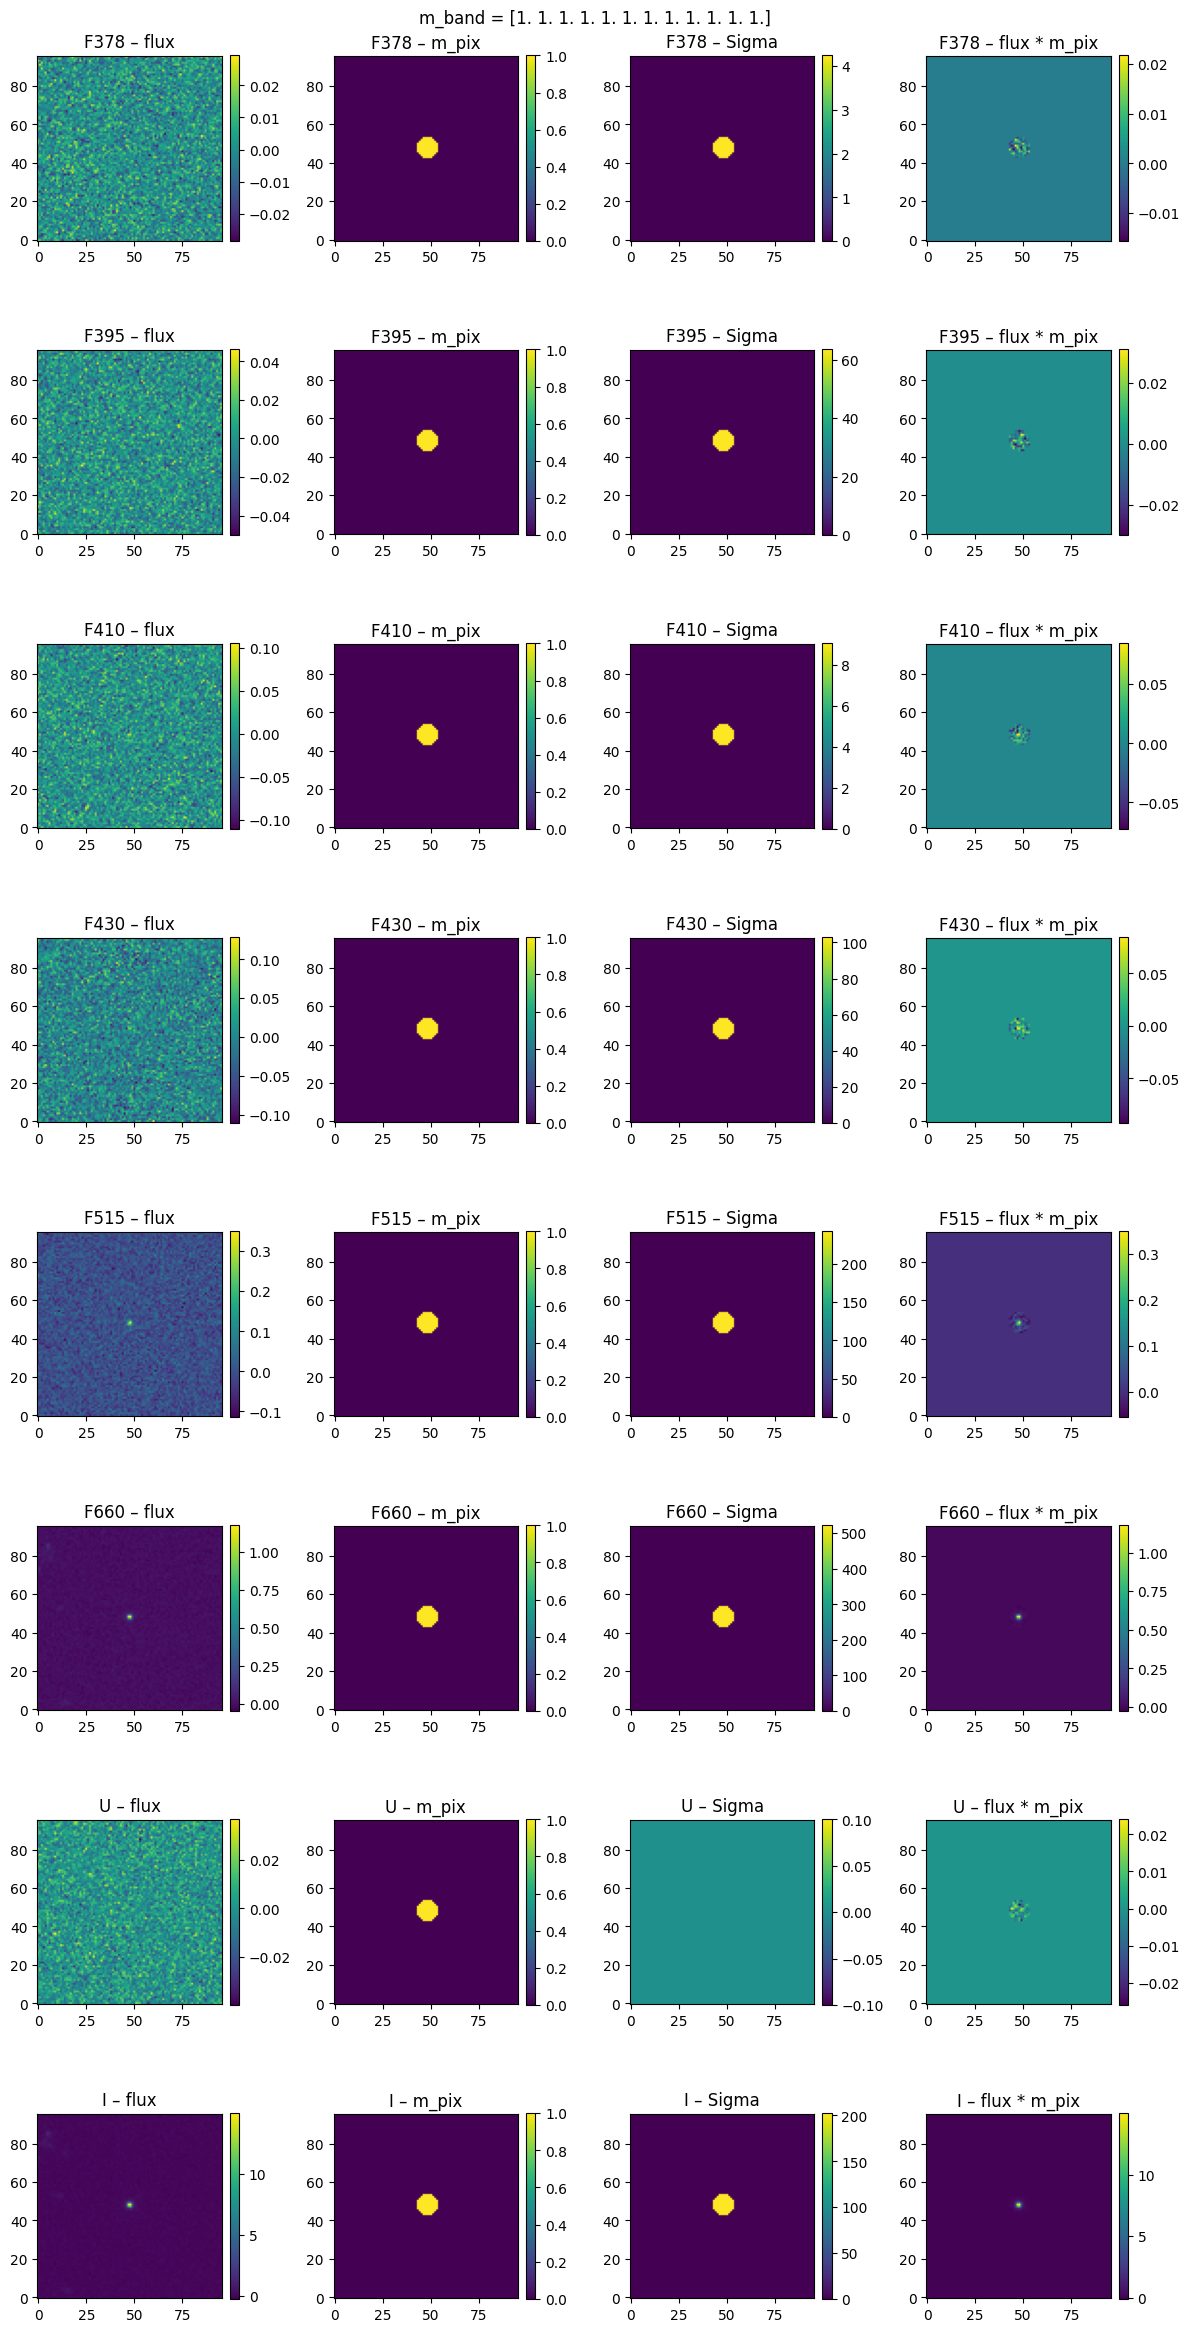

In [10]:
idx = 10005
x, Sigma, m_pix, m_band = row_to_tensors_torch(df, idx, device="cpu")
debug_plot_sample_torch(x, Sigma, m_pix, m_band, band_indices=(0,1,2,3, 4,5, 7, 10))

In [11]:
from torch.utils.data import Dataset, DataLoader

class SplusDataset(Dataset):
    def __init__(self, df: pl.DataFrame):
        self.df = df

    def __len__(self):
        return self.df.height

    def __getitem__(self, idx):
        # keep tensors on CPU here; move to GPU in training loop
        x, Sigma, m_pix, m_band = row_to_tensors_torch(self.df, idx, device="cpu")
        return x, Sigma, m_pix, m_band

In [12]:
import torch.nn as nn

class ConvAutoEncoder(nn.Module):
    def __init__(self, in_channels: int = 12, latent_dim: int = 256):
        super().__init__()

        # Encoder: 96→48→24→12
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 96 -> 48

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 48 -> 24

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),  # 24 -> 12
        )

        self.enc_flat_dim = 128 * 12 * 12

        self.fc_enc = nn.Linear(self.enc_flat_dim, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, self.enc_flat_dim)

        # Decoder: 12→24→48→96
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),  # 12 -> 24
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),   # 24 -> 48
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(32, in_channels, kernel_size=2, stride=2),  # 48 -> 96
            # no activation: we regress flux directly
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        z = self.fc_enc(h)
        return z

    def decode(self, z):
        h = self.fc_dec(z)
        h = h.view(z.size(0), 128, 12, 12)
        x_hat = self.decoder(h)
        return x_hat

    def forward(self, x):
        z = self.encode(x)
        x_hat = self.decode(z)
        return x_hat, z

In [13]:
def reconstruction_loss(x, x_hat, m_pix, Sigma=None, eps=1e-6):
    """
    x, x_hat, m_pix, Sigma: (B, C, H, W)
    - m_pix: 0/1 (or 0..1) pixel validity mask
    - Sigma: optional per-pixel inverse variance (0 outside object)
    """
    diff2 = (x_hat - x) ** 2

    if Sigma is not None:
        weights = Sigma * m_pix    # only where both Sigma>0 and valid
    else:
        weights = m_pix

    num = (weights * diff2).sum()
    den = weights.sum() + eps

    return num / den

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

dataset = SplusDataset(df)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

model = ConvAutoEncoder(in_channels=len(BANDS), latent_dim=256).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

use_sigma_in_loss = True  # flip to False if you want only m_pix

for epoch in range(10):  # adjust
    model.train()
    running_loss = 0.0

    for x, Sigma, m_pix, m_band in loader:
        x = x.to(device)           # (B,C,H,W)
        Sigma = Sigma.to(device)
        m_pix = m_pix.to(device)

        # Optionally mask input too, so encoder sees only object pixels
        x_in = x * m_pix

        optimizer.zero_grad()
        x_hat, z = model(x_in)

        loss = reconstruction_loss(
            x=x,
            x_hat=x_hat,
            m_pix=m_pix,
            Sigma=Sigma if use_sigma_in_loss else None,
        )

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x.size(0)

    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}: loss={epoch_loss:.4e}")

device: cuda


Epoch 1: loss=7.9031e+01
Epoch 2: loss=5.2277e+01


KeyboardInterrupt: 